<a href="https://colab.research.google.com/github/4may/SuperResolutionSurvey/blob/master/SRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super-Resolution Convolutional Neural Network(SRCNN)

* 元祖、超解像度ネットワーク。

* [mediumに良さそうな記事](https://medium.com/datadriveninvestor/using-the-super-resolution-convolutional-neural-network-for-image-restoration-ff1e8420d846)があったので、試す。

* オリジナルの論文は[こちら](https://arxiv.org/abs/1501.00092)

## はじめに

* SRCNNはNNベースの超解像度手法
* 古来の超解像技術であるsparse coding method4よりも優れている

## アーキテクチャ

SRCNNの学習手順は以下の通り。

1. Preprocessing : 入力のLR画像を所望のHRサイズにupsamplingする. あくまでサイズを大きくしただけで、現時点ではHR画像になっていないことに注意(ぼやぼやーとした画像になっている)
2. Feature Extraction : upsamplingした画像からfeature mapを生成する
3. Non-linear mapping : feature mapから複数のパッチを作る。※パッチ：画像の一部部分を切り出したもの
4. Reconstruction : 3で作った複数のパッチを組み合わせてHR画像を生成する

以下に図で示す。

In [0]:
import matplotlib.pyplot as plt
import cv2

In [0]:
def show_image(filepath):
  plt.figure(figsize=(15, 15))
  img = cv2.imread(filepath)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

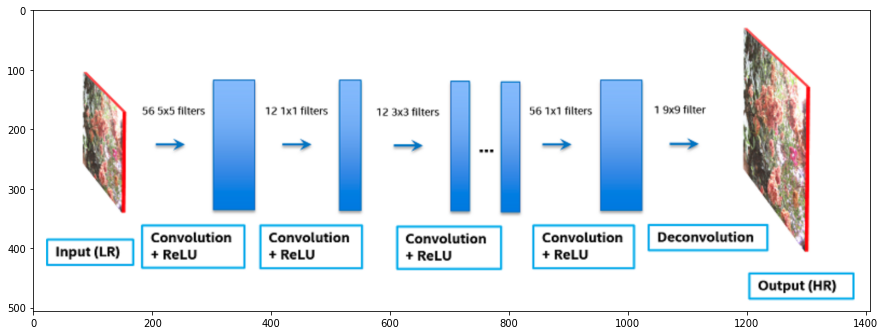

In [5]:
show_image("srcnn.png")

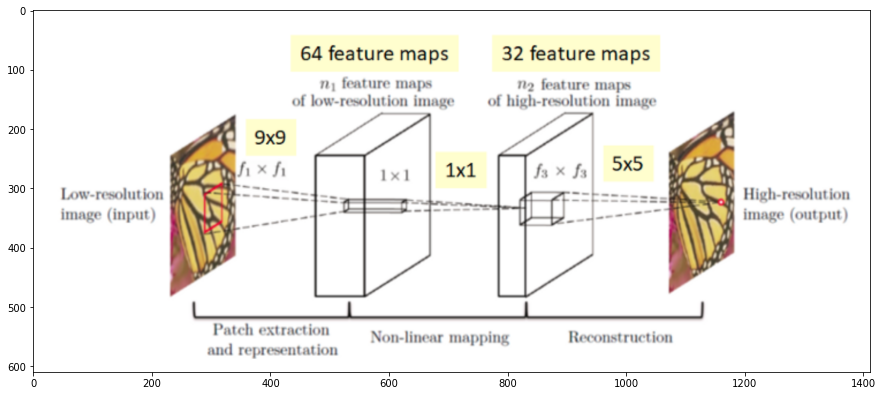

In [6]:
show_image("srcnn2.png")

### その他、実装に関する補足

* 以下の性能指標を使用する
  * PSNR
  * MSE
  * SSIM(Structual Similarity Index)
* データの前処理と後処理にOpenCVを使う
  * SRCNNは、RGBではなくYCrCb空間の画像データを扱う

## 実装

以下の手順で行う。

1. 使用パッケージのインポート
2. 評価指標の定義
3. データの前処理
4. 評価指標の動作確認
5. モデリング
6. 学習